Section 7 
=============
Introduction to Deep Learning with TensorFlow  
----------
Sunday 16 October 11am EDT and Tuesday 18 October 9pm EDT (Q/A session)

---   
- Step 0 -     
=================

Preliminaries - loading libraries and styles
---------------

---

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
from six.moves import range

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

import tensorflow as tf

In [2]:
# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),            
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#e41a1c', '#377eb8', '#4daf4a'])
dark2_cmap=ListedColormap(dark2_colors)

def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 150
    rcParams['axes.prop_cycle'].by_key()['color'][1]
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 14
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()

In [3]:
## Markdown CSS
from IPython.core.display import HTML
HTML("""
<style>

div.cell { 
    margin-top:1em;
    margin-bottom:1em;
}

div.text_cell_render h1 {
    font-size: 2.em;
    line-height:1.2em;
    text-align:center;
}

div.text_cell_render h2 {
margin-bottom: -0.2em;
}

table tbody tr td:first-child, 
table tbody tr th:first-child, 
table thead tr th:first-child, 
table tbody tr td:nth-child(4), 
table thead tr th:nth-child(4) {
    background-color: #edf4e8;
}

div.text_cell_render { 
    font-family: 'Garamond';
    font-size:1.5em;
    line-height:1.3em;
    padding-left:3em;
    padding-right:3em;
}
</style>
""")

In [4]:
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


#### Please download and unzip the notMNIST digit dataset from Canvas [at the link here](https://canvas.harvard.edu/files/2946531/download?download_frd=1). It is a 112 MB zipped file which contains a pickled Python dataset named ```notMNIST.pickle```. The file should be placed in the same folder as this Notebook

---   
- Step 1 -     
=================

Introduction - how it works
---------------

---

### A simple Hello World - placeholders, variables and operators   

We start with a simple multiplication, calculating ```y``` directly from two inputs ```a``` and ```b```   

---  
TensorFlow uses symbolic variables, defined by ```tf.placeholder("dtype")``` Typically, these variables will be given values upon running the program, and they will be the inputs to calculations.   A simple examples is multiplication, but there are many other simple operators that TensorFlow implements - basically all of the common operators in Numpy.  Placeholders can be scalars, as below, or tensors of any shape.   

Once we have define the operation with ```tf.mul(a,b)```, we need to tell TensorFlow what we want it to do. So we create a new TensorFlow session with ```tf.Session()```, attributing the session to a reference variable ```session```. With this, we can later reference the session, as we do in the print statement. We invoke the ```run()``` method which tells TensorFlow to start the program that we have made. 

Specifically, in the statement ```session.run(y, feed_dict={a: 3, b: 3})```, we tell TensorFlow to solve the function ```y```, and we specify the ```feed_dict``` which is a Python dict that contains the values for the placeholders. TensorFlow will look for the values of any placeholders in ```feed_dict``` - i.e. all variables in a model that are not given values in the program itself. If you forget to feed the values here, TensorFlow will complain.

In [5]:
a = tf.placeholder("float32")
b = tf.placeholder("float32")
  
y = tf.mul(a, b)
  
session = tf.Session()
  
print (session.run(y, feed_dict={a: 3, b: 3}))

9.0


As expected, TensorFlow solves for ```y``` and prints out the answer.   

You might call the method ```run()``` several times in the course of implementing your TensorFlow program. Anytime you want TensorFlow to yield you the value of model variable (e.g. a loss function, a tensor variable, or whatever is on the left-hand side of an equal sign), you can call ```run()```.    

There is also another TensorFlow class to invoke an interactive session, using ```tf.InteractiveSession()```.   Let's look at the set of simple operations:  

### Simple operations   

| Operator   |  Description | | Operator   |  Description |
|------: |:------| ------: | |:------|
| tf.add	| sum || tf.square	|  square | 
| tf.sub	| substraction || tf.round	| nearest integer | 
| tf.mul	| multiplication || tf.sqrt	| square root | 
| tf.div	| division ||  tf.pow	|  power | 
| tf.mod	| modulo || tf.exp	| exponential |
| tf.abs	| absolute value ||  tf.log	| logarithm | 
| tf.maximum	| maximum || tf.minimum	|  minimum | 
| tf.inv	| the inverse |    |     |

### Matrix operations
| Operator   |  Description |
|------: |:------| 
| tf.diag	| returns a diagonal tensor with a given diagonal values| 
| tf.transpose	| returns the transposes of the argument| 
| tf.matmul	| returns a tensor product of multiplying two tensors listed as arguments| 
| tf.matrix_determinant	| returns the determinant of the square matrix specified as an argument| 
| tf.matrix_inverse	| returns the inverse of the square matrix specified as an argument| 

### Simple Example #1: HW2 Problem 4, the Painful 2D function    

Next, we make ```x``` and ```y``` tensorflow variables and iterate to a solution for the optimization of an objective ```obj```, using the built-in gradient descent optimizer. This is what we will do in general, when we minimize a given loss function. The TensorFlow type ```tf.Variable()``` defines a variable that you want it to estimate: this will usually be your weights and bias terms in a Neural Network, but it can be any tensor in fact. Here it is simply the scalars ```x``` and ```y```. You can initialize it with some value, here ```tf.random_uniform([1], -4.0, 4.0)```, and give it a name. We can then use the two variables thus defined as part of an objective function that we want to solve.  Remember this one:

$ 100 \cdot x \cdot \exp(-0.5 \cdot x^2 + 0.5 \cdot x - 0.5 \cdot y^2 - y + \pi) $

What does [Wolfram Alpha say][1] about the shape of this function?

[1]:https://www.wolframalpha.com/input/?i=100%E2%8B%85x%E2%8B%85exp%E2%81%A1(%E2%88%920.5%E2%8B%85x2%2B0.5%E2%8B%85x%E2%88%920.5%E2%8B%85y2%E2%88%92y%2B%CF%80)

In [6]:
x = tf.Variable(tf.random_uniform([1], -1.0, 1.0),'x')
y = tf.Variable(tf.random_uniform([1], -1.0, 1.0),'y')

obj = tf.mul(100.0,tf.mul(x,tf.exp(tf.add(tf.sub(
                    tf.sub(tf.add(tf.mul(-0.50,tf.square(x)),
                                  tf.mul(0.50,x)),tf.mul(0.50,tf.square(y))),y),np.pi))))

Next we specify the optimizer that we want to use,   

    tf.train.GradientDescentOptimizer(0.00005)  
specifying the step multiplier as a parameter. The objective function is defined by  

    train = optimizer.minimize(obj)  
We could also chain both together in one espression.

In [7]:
optimizer = tf.train.GradientDescentOptimizer(0.00005)
train = optimizer.minimize(obj)

As we have defined variables we need to initialize them. To do this we create another reference variable ```init```, assigning it ```tf.initialize_all_variables()```. Once we create a session using once again ```tf.Session()```, we can run the initialization with ```sess.run(init)```. Anytime we want to reinitialize, we can repeat this.

In [8]:
init = tf.initialize_all_variables()
 
sess = tf.Session()
sess.run(init)

Next, we run a ```for``` loop of 500 iterations. At each step, we ask TensorFlow to perform the optimisation with ```sess.run(train)```, and every tenth step, we print out  

    step, sess.run(x), sess.run(y), sess.run(obj).    
    
Notice that the ```run()``` method is used repeatedly. 

In [9]:
for step in range(300):
    sess.run(train)
    if step % 10 == 0:
        print (step, sess.run(x), sess.run(y), sess.run(obj))

0 [-0.50250208] [ 0.68316936] [-318.80279541]
10 [-0.64363992] [ 0.35968256] [-574.11083984]
20 [-0.73583865] [-0.06785677] [-959.99145508]
30 [-0.77210933] [-0.47805366] [-1296.97338867]
40 [-0.77961457] [-0.7438798] [-1438.421875]
50 [-0.78063989] [-0.87995374] [-1475.7130127]
60 [-0.78076088] [-0.94436568] [-1484.08666992]
70 [-0.78077459] [-0.97428119] [-1485.89367676]
80 [-0.7807762] [-0.98811698] [-1486.2800293]
90 [-0.78077632] [-0.99451023] [-1486.36279297]
100 [-0.78077632] [-0.99746388] [-1486.38049316]
110 [-0.78077632] [-0.99882841] [-1486.3840332]
120 [-0.78077632] [-0.99945879] [-1486.38500977]
130 [-0.78077632] [-0.99975008] [-1486.38500977]
140 [-0.78077632] [-0.99988455] [-1486.38500977]
150 [-0.78077632] [-0.99994671] [-1486.38500977]
160 [-0.78077632] [-0.99997544] [-1486.38500977]
170 [-0.78077632] [-0.99998862] [-1486.38500977]
180 [-0.78077632] [-0.9999947] [-1486.38500977]
190 [-0.78077632] [-0.99999756] [-1486.38500977]
200 [-0.78077632] [-0.99999893] [-1486.385

Easy. We didn't even need 500 iterations. Try playing around with the starting points and the step size parameter to see how the results change. To fix a starting value for ```x``` and ```y```, you can use, for example:    

    x = tf.Variable([-2.0],'x')  

    y = tf.Variable([2.0],'y')


In [10]:
x = tf.Variable([-2.0],'x')
y = tf.Variable([2.0],'y')


obj = tf.mul(100.0,tf.mul(x,tf.exp(tf.add(tf.sub(
                    tf.sub(tf.add(tf.mul(-0.50,tf.square(x)),
                                  tf.mul(0.50,x)),tf.mul(0.50,tf.square(y))),y),np.pi))))

optimizer = tf.train.GradientDescentOptimizer(0.0005)
train = optimizer.minimize(obj) 

init = tf.initialize_all_variables()
 
sess = tf.Session()
sess.run(init)

for step in range(150):
    sess.run(train)
    if step % 10 == 0:
        print (step, sess.run(x), sess.run(y), sess.run(obj))

0 [-1.99577963] [ 1.99366951] [-4.33755589]
10 [-1.94677186] [ 1.91990888] [-5.93967867]
20 [-1.8790518] [ 1.81717634] [-9.06431484]
30 [-1.77236235] [ 1.65315473] [-17.16110992]
40 [-1.54356551] [ 1.28980696] [-60.1096077]
50 [-0.79220051] [-0.89547592] [-1478.03442383]
60 [-0.78841639] [-0.99999988] [-1486.27124023]
70 [-0.78596187] [-1.] [-1486.33239746]
80 [-0.78430086] [-1.] [-1486.36071777]
90 [-0.7831738] [-1.] [-1486.37390137]
100 [-0.78240794] [-1.] [-1486.38000488]
110 [-0.78188694] [-1.] [-1486.38256836]
120 [-0.78153229] [-1.] [-1486.38415527]
130 [-0.78129113] [-1.] [-1486.38452148]
140 [-0.7811271] [-1.] [-1486.38500977]


### Tensor operations   

| Operator   |  Description |
|------: |:------|
| tf.shape	| To find a shape of a tensor| 
| tf.size	| To find the size of a tensor| 
| tf.rank	| To find a rank of a tensor| 
| tf.reshape	| To change the shape of a tensor keeping the same elements contained| 
| tf.tile	| To create a new tensor replicating a tensor multiple times| 
| tf.squeeze	| To delete in a tensor dimensions of size 1
| tf.expand_dims	| To insert a dimension to a tensor 
| tf.slice	| To remove a portions of a tensor
| tf.split	| To divide a tensor into several tensors along one dimension
| tf.concat	| To concatenate tensors in one dimension| 
| tf.reverse	| To reverse a specific dimension of a tensor| 
| tf.transpose	| To transpose dimensions in a tensor| 
|   |   |
| tf.reduce_sum	| The sum of the elements along one tensor dimension | 
| tf.reduce_prod	| The product of the elements along one tensor dimension | 
| tf.reduce_min	| The minimum of the elements along one tensor dimension | 
| tf.reduce_max	| The maximum of the elements along one tensor dimension | 
| tf.reduce_mean	| The mean of the elements along one tensor dimension | 
| tf.argmin	| The index of the minimum value element along one tensor dimension |
| tf.argmax	| The index of the maximum value element along one tensor dimension |

#### Now might be a good time to ask: what is a tensor?

### Example #2: HW2 Problem 2, Regression of one variable - Moore's Law

Now that we have seem the basic elements of a TensorFlow model, let's use it to estimate a linear regression, and see how the optimization process leads to the same answer that we would get from an Ordinary Least Squares (OLS) regression. 

In [11]:
mooreDF = pd.read_csv('mooresLawHw.txt', sep='\t')[["Intel Processor", "Year", "Transistors"]]
mooreDF.head()

,Intel Processor,Year,Transistors
0,4004,1971.9,2300
1,8008,1972.3,3500
2,8080,1974.3,6000
3,8085,1976.3,6500
4,8086,1978.5,29000


As in the HW2 problems, let's set up the model where Year is the explanatory factor we regress the log of Transistors on it. The first part is just Numpy - but we could also use the TensorFlow simple operators from above. We want to subtract the base year of 1970 and then standardize the values - this puts the problem in a more *comfortable* optimization space.   

Then we set up the weight ```W``` and the bias ```b``` terms - the weights will be initialized randomly and the bias given a starting value of zero. As we will soon see, this is *really* similar to how we will define a Neural Net model. We finish by specifying the linear model as ```y_hat = W * X + b```. 

In [12]:
X = mooreDF.Year.astype('float32').values-1970.0
y = np.log(mooreDF.Transistors.astype('float32').values)
X = list(X / np.std(X))
y = list(y / np.std(y))

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y_hat = W * X + b

For OLS, we want to minimize the squared residuals - which is simply a loss function given by: 

    tf.reduce_mean(tf.square(tf.sub(y_hat,y)))
As before, we define ```train``` to be the function to optimize, and then initialize all the variables.

In [13]:
loss = tf.reduce_mean(tf.square(tf.sub(y_hat,y)))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
 
sess = tf.Session()
sess.run(init)

We will run for 500 iterations, plotting out the estimated line (i.e. the line given by the the Weight ```W``` and the bias ```b```) at each 50th iteration. 

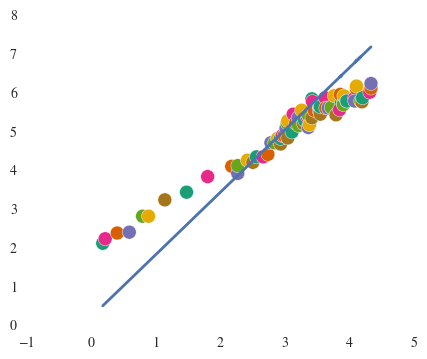

0 [ 1.60886478] [ 0.23368959]


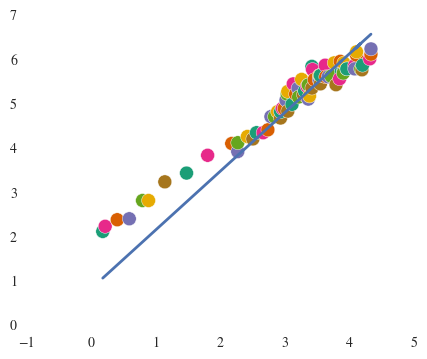

50 [ 1.32643402] [ 0.84413284]


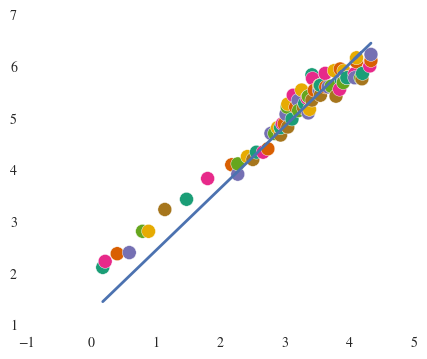

100 [ 1.20480382] [ 1.25586748]


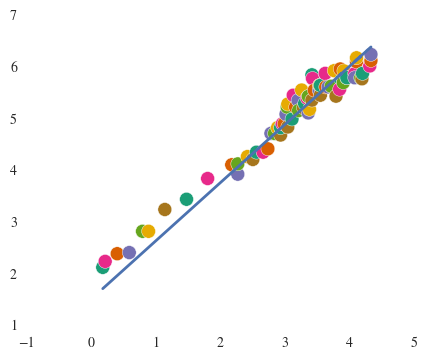

150 [ 1.12633204] [ 1.52150488]


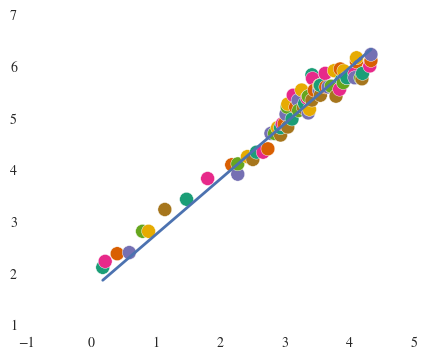

200 [ 1.07570493] [ 1.69288468]


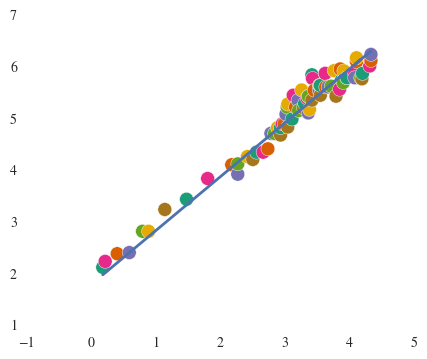

250 [ 1.04304206] [ 1.80345297]


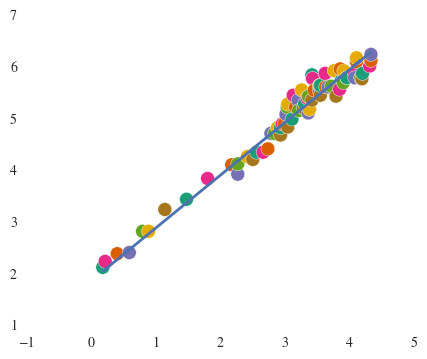

300 [ 1.02196908] [ 1.87478781]


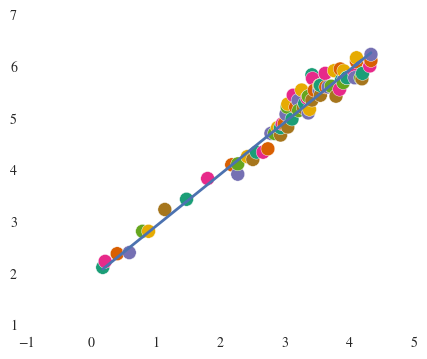

350 [ 1.0083735] [ 1.92081046]


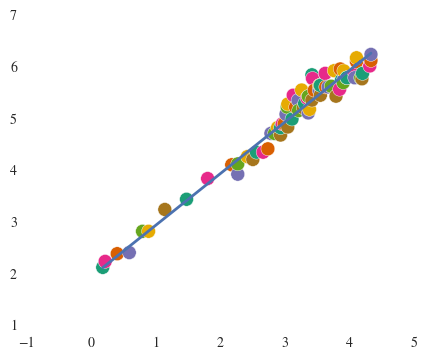

400 [ 0.99960214] [ 1.95050287]


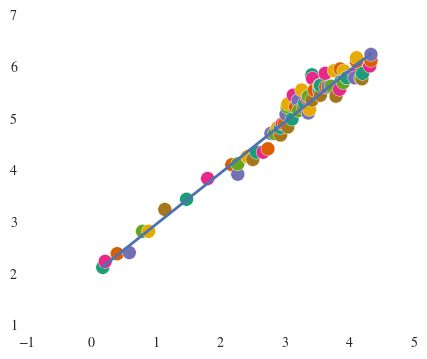

450 [ 0.99394315] [ 1.96965933]


In [14]:
for step in range(500):
    sess.run(train)
    if step % 50 == 0:
        plt.figure(figsize=(5,4))
        plt.scatter(X, y, s=100, c=dark2_colors)
        plt.plot(X, sess.run(W) * X + sess.run(b))
        plt.show()
        print (step, sess.run(W), sess.run(b))

That's how it works. We see that on each iteration, TensorFlow is adjusting the ```W``` and the ```b``` according to the Gradient Descent algorithm. We stop it arbitrarily after 500 iterations, but we could also define a stopping criterion. Next, for Neural Nets, we will be building on the same programming model - using variables, placeholders, models (or loss functions) and optimizers - at at each step, just making the definitions more elaborate.


*Note: Examples from the Udacity course on Deep Learning*
=======

The remainder of the notebook uses the examples gratuitously taken from the first four assignments from the recent Udacity course on [Deep Learning](https://www.udacity.com/course/deep-learning--ud730). They cover the principal methods to get "up and running" with TensorFlow, in particular for the analysis of images. Assignments 5 and 6 of the course investigate text analysis and are not included here. The Udacity course has lectures by Google Brain lead Vincent Vanhoucke, which give a concise overview of the concepts.   


---

---   
- Step 1 -     
=================

Loading, visualizing the pickled data
---------------

---


As in the Udacity course, we will be using the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset of letters A -- J for the examples - while it resembles the well-known [MNIST](http://yann.lecun.com/exdb/mnist/) digit dataset, it adds a little more variety to the images: different fonts, some noise, missing patches, etc. As a result, the ten labels are slightly more difficult to predit than MNIST.  

Each image is a gray-scale 28x28 pixel image of a single character rendered in a variety of fonts and labelled in one of 10 classes 'A' through 'J' (10 classes).   

The dataset that is in the pickle file that you have downloaded is a subset of the full notMNIST set - but rather a random sample of 20000 training images, 10000 validation images and 10000 test images. Once it has been have downloaded, unzipped and placed in the same folder as this notebook, we can open the pickle file. Those who want to pursue further with this dataset (and faster computers or GPUs) can download the full 500K images and create larger datasets - the intro assignment of the Udacity course can show you how. 

In [102]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory - get rid of the pickle load
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


We now have each of ```_dataset``` and ```_labels``` for all three datasets. 

---
Visualizing the data
---------

We can use matplotlib image to visualize the images. First we check the first two rows of the training dataset and labels. The datasets consist of a 3D array (image index, x, y) of floating point values. Each image has already been normalized to have approximately zero mean and standard deviation of approximately 0.5 . 

Once we print out the first two rows, we randomly select 5 images from each dataset - which will be an image of a character A through J rendered in various fonts. As we may see, some of the images are a quite liberal interpetation of the character.

---

[[[ 0.5         0.5         0.5        ..., -0.5        -0.5        -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.49607843 -0.5        -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.49607843 -0.49607843 -0.5       ]
  ..., 
  [ 0.5         0.5         0.5        ..., -0.5        -0.49607843 -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.49215686 -0.5        -0.5       ]
  [ 0.5         0.5         0.5        ..., -0.5        -0.5        -0.5       ]]

 [[-0.5        -0.01764706  0.5        ...,  0.5         0.48823529
    0.48039216]
  [-0.5        -0.45294118 -0.31568629 ...,  0.5         0.05686275
   -0.44901961]
  [-0.49607843 -0.5        -0.44509804 ...,  0.5        -0.00588235 -0.5       ]
  ..., 
  [-0.49607843 -0.5        -0.44509804 ...,  0.5        -0.00588235 -0.5       ]
  [-0.5        -0.45294118 -0.31568629 ...,  0.5         0.05686275
   -0.44901961]
  [-0.5        -0.01764706  0.5        ...,  0.5         0.48823529
    0.48039216

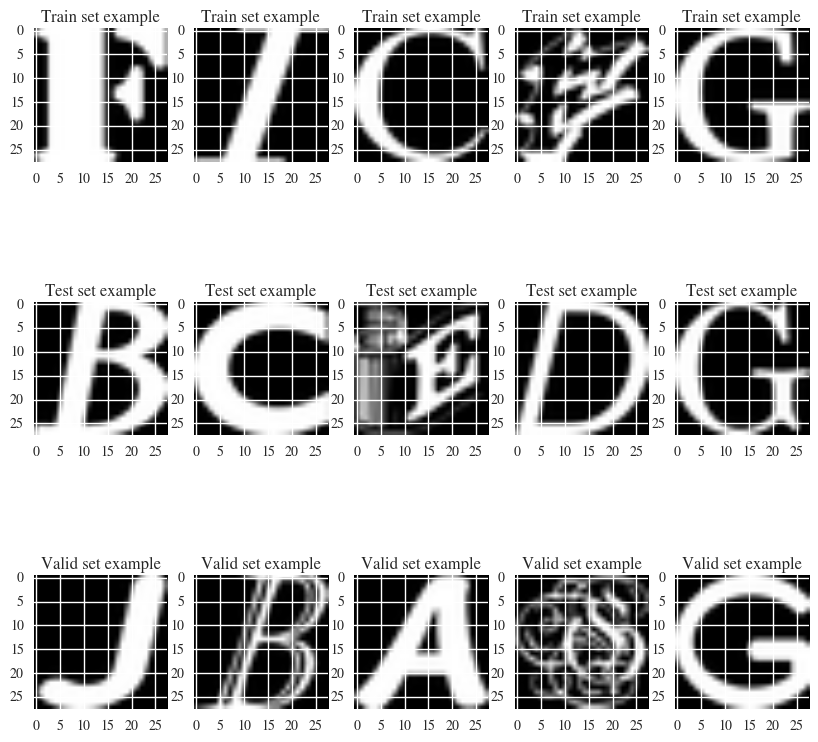

In [23]:
import matplotlib.image as mpimg
plt.ion()
fig1 = plt.figure(figsize=(10, 10))
plt.gray()

print (train_dataset[:2,:,:])
print (train_labels[:2])

for k in range(5):
    i = np.random.choice(range(len(train_dataset)))
    img = train_dataset[i, :, :]
    imgplot1 = fig1.add_subplot(3,5,k+1)
    imgplot1.imshow(img)    
    imgplot1.set_title("Train set example")

for k in range(5):
    i = np.random.choice(range(len(test_dataset)))
    img = test_dataset[i, :, :]
    imgplot2 = fig1.add_subplot(3,5,k+6)
    imgplot2.imshow(img)    
    imgplot2.set_title("Test set example")

for k in range(5):
    i = np.random.choice(range(len(valid_dataset)))
    img = valid_dataset[i, :, :]
    imgplot3 = fig1.add_subplot(3,5,k+11)
    imgplot3.imshow(img)    
    imgplot3.set_title("Valid set example") 
    
plt.show()

---
Logistic Regression with SciKit-Learn
---------

After HW2, you now have a good knowledge of the SciKit Learn package classifiers. Before looking at Deep Learning, how would an 'off-the-shelf' SciKit Learn classifier like logistic regression perform? We will now train a simple model using 50, 100, 1000, 5000 and 10000 training samples and the logistic regression classifier and check the accuracy.  We use reshape to make each 28 by 28 image grid into a 784 array. 

---

In [26]:
kays = [50, 100, 1000, 5000, 10000]
for k in kays:
    X_train = train_dataset[:k,:,:].reshape(k,784)
    y_train = train_labels[:k]
    X_valid = valid_dataset[:k,:,:].reshape(k,784)
    y_valid = valid_labels[:k]
    X_test = test_dataset[:k,:,:].reshape(k,784)
    y_test = test_labels[:k]
    
    clf = LogisticRegression().fit(X_train, y_train)
    print(k, ' samples - Logistic Regression score on valid: %f'
          % clf.score(X_valid, y_valid))
    print(k, ' samples - Logistic Regression score on test: %f\n'
          % clf.score(X_test, y_test))    
print(clf.coef_.shape)

50  samples - Logistic Regression score on valid: 0.600000
50  samples - Logistic Regression score on test: 0.660000

100  samples - Logistic Regression score on valid: 0.780000
100  samples - Logistic Regression score on test: 0.760000

1000  samples - Logistic Regression score on valid: 0.786000
1000  samples - Logistic Regression score on test: 0.849000

5000  samples - Logistic Regression score on valid: 0.771800
5000  samples - Logistic Regression score on test: 0.847000

10000  samples - Logistic Regression score on valid: 0.785700
10000  samples - Logistic Regression score on test: 0.855200

(10, 784)


We get the accuracy score on the validation set to 78.5% for 10000 training samples and to 85.5% on the test set. Now let's see what a logistic regression model in TensorFlow can do.

---
- Step 2 - 
===========   
Simple models in TensorFlow
-------------

We will work on developing progressively more accurate models with TensorFlow. The objective is to discover how to construct deeper models introduce regularization so that we do not overfit on the training data. Overfitting will show-up as high training accuracy but where the model does not perform well on the validation and test data. 

---

The first step is to reformat the images - as we did for the SciKitLearn example above - into a flat array that's more adapted to the simple multilayer models that we will use as examples, and to transform the labels into one-hot-encoded matrices with 10 columns. We reformat the data structures in-place (please remember this when running the notebook later - to get the original image matrices - reload the pickle file.)

In [103]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


---
Multinomial logistic regression using simple gradient descent
---------

As above, we start by describing the elements of the model to optimize using gradient descent. However, now we will define a graph which describes the computations. Once defined, this graph can visualized using Tensorboard in a browser. The edges will be the tensors and the nodes will be the input, operations and outputs.  

In addition to creating the session, we will now define the graph with ```graph = tf.Graph()``` and create the computation process within a block under  

      with graph.as_default():

The data are attached to the graph using ```tf.constant()```. We do this for both the labels and images for the training set and also for the images in the both the valid and test data.

We construct the weights ```W``` and biases ```b```, specify their size and define how they should be initialized:    

    weights = tf.Variable(tf.truncated_normal([784, 10]))
    biases = tf.Variable(tf.zeros([10]))

We create an expression for ```logits``` which defines the linear part of the logistics regression:  

    logits = tf.matmul(tf_train_dataset, weights) + biases  
    
and define the loss function using the TensorFlow function:  

    tf.nn.softmax_cross_entropy_with_logits()
The function combines both the softmax tranformation and the entropy calculation from the logit model.  *What is softmax?* If we think of ```logits``` providing an output of evidence for the respective classes, softmax is a normalized function that is used to transform these evidences to probabilities. 

$$ \textrm{softmax}(x_i) =  \frac{\exp{x_i}}{\sum_j \exp{x_j}} $$   

The resulting probabilities will be between $0$ and $1$ and will sum to $1$ across the classes. Using softmax, evidences which are large will give rise to probabilities close to $1$ (i.e a good prediction), and evidences that are small will yield probabilities close to $0$ (i.e a weak prediction). Cross entropy is used a metric for the error of the classification. We could also achieve the same thing in separate steps with  

    probs = tf.nn.softmax(logits)
    loss = -tf.reduce_sum(tf.mul(tf_train_labels, tf.log(probs)))
but since this is a pair of functions that are used often, TensorFlow has combined them.

We can run the operations on this graph as many times as wanted by calling ```session.run()```, providing in the parentheses of ```run()``` the outputs to fetch from the graph that will then get returned. This runtime operation is all contained in the block below:

      with tf.Session(graph=graph) as session:

To save some time, we will only load half the data into TensorFlow and build the computation graph corresponding to our training, so 10000 images.

---

In [41]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 10000

graph = tf.Graph()
with graph.as_default():

    # Input data.
    # Load the training, validation and test data into constants that are
    # attached to the graph.
    tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
    tf_train_labels = tf.constant(train_labels[:train_subset])
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    # These are the parameters that we are going to be training. The weight
    # matrix will be initialized using random values following a (truncated)
    # normal distribution. The biases get initialized to zero.
    weights = tf.Variable(tf.truncated_normal([784, 10]))
    biases = tf.Variable(tf.zeros([10]))
  
    # Training computation.
    # We multiply the inputs with the weight matrix, and add biases. We compute
    # the softmax and cross-entropy (it's one operation in TensorFlow, because
    # it's very common, and it can be optimized). We take the average of this
    # cross-entropy across all training examples: that's our loss.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
    # Optimizer.
    # We are going to find the minimum of this loss using gradient descent.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    # These are not part of training, but merely here so that we can report
    # accuracy figures as we train.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

Let's run this computation and iterate. We need to define a function to calculate the accuracy. This will take the class with the highest probility as the choice prediction and sum up the counts of what proportion were correct.  

Note the following changes in the code, compared to the simple models before:
- we run ``` tf.initialize_all_variables()``` directly without using ```init```.
- we collect the optimizer, loss and predictions and save them in ```_, l, predictions```
- we print out the results every 100 epochs
- we write to the TensorBoard graph to show the computation visually.     

For writing to Tensorboard, we added the lines:  

    merged = tf.merge_all_summaries() 
    writer = tf.train.SummaryWriter("/tmp/tensorflowlogs", session.graph)
    
Notice that we use ```eval()``` in place of ```run()``` for  ```valid_prediction.eval()```. These are similar, except ```eval()``` will give a numpy array output containing the evaluated predictions. 

In [42]:
num_epochs = 3001

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

with tf.Session(graph=graph) as session:

    tf.initialize_all_variables().run() # initialize random numbers for weights and zeros for biases
    merged = tf.merge_all_summaries()  # the next two lines are for the TensorBoard graph
    writer = tf.train.SummaryWriter("/tmp/tensorflowlogs", session.graph)
    print('Initialized')
    for epoch in range(num_epochs):
 
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (epoch % 100 == 0):
            print('Loss at epoch %d: %f' % (epoch, l))
            print('Training accuracy: %.1f%%' % accuracy(predictions, train_labels[:train_subset, :]))
            print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
    print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Loss at epoch 0: 18.582718
Training accuracy: 13.5%
Validation accuracy: 15.1%
Loss at epoch 100: 2.270614
Training accuracy: 71.9%
Validation accuracy: 70.2%
Loss at epoch 200: 1.850816
Training accuracy: 75.0%
Validation accuracy: 72.7%
Loss at epoch 300: 1.616717
Training accuracy: 76.2%
Validation accuracy: 73.5%
Loss at epoch 400: 1.458175
Training accuracy: 76.9%
Validation accuracy: 73.8%
Loss at epoch 500: 1.340619
Training accuracy: 77.7%
Validation accuracy: 74.2%
Loss at epoch 600: 1.247816
Training accuracy: 78.3%
Validation accuracy: 74.6%
Loss at epoch 700: 1.171608
Training accuracy: 78.8%
Validation accuracy: 74.8%
Loss at epoch 800: 1.107379
Training accuracy: 79.1%
Validation accuracy: 75.0%
Loss at epoch 900: 1.052199
Training accuracy: 79.5%
Validation accuracy: 75.3%
Loss at epoch 1000: 1.004122
Training accuracy: 79.8%
Validation accuracy: 75.3%
Loss at epoch 1100: 0.961770
Training accuracy: 80.2%
Validation accuracy: 75.4%
Loss at epoch 1200: 0.92412

With 3001 epochs, we see that on the same size sample of 10000 images, Logistic Regression with TensorFlow gets an accuracy score of 76.0% on the validation set and 83.5% on the test set. The SciKitLearn version, got 78.5% on the validation set and 85.5% on the test set.   

Hmmm. Why doesn't TensorFlow do better?

---   
Logistic regression with stochastic gradient descent
----------------    

Stochastic gradient descent training is much faster, using batches of samples. 

The main parts of the graph will be similar to above, however since we are proceeding in batches, so instead of holding all the training data into a constant node with ```tf.constant()``` , we create a placeholder node with ``` tf.placeholder()``` node which we will feed with 256-image *minibatches* of data for every call of ```session.run()```. The valid and test datasets remain full and constant.

---

In [43]:
batch_size = 256

graph = tf.Graph()
with graph.as_default():

    # Input data, with a placeholder to feed the training data at run time.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    weights = tf.Variable(tf.truncated_normal([784, 10]))
    biases = tf.Variable(tf.zeros([10]))

    # Training computation.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

To be able to run the minibatches, we need to create an offset for the training dataset, which will progressively pull equal sized chunks of images at each epoch. Generally, for SGD, we want the minitbatches to be fully random across epochs. Once we have the created the offset, we can generate each minibatch. 

Keeping random all the batches that you feed a network is key. You never want a neural network to become "accustomed" to the data. If you run a lot of epochs, you will see that after your training accuracy ceases to improve, your test accuracy starts to fall. Then, you need to stop, mix up your training data by randomizing, then start training again. 

We also need to use `feed_dict` to pass the minibatches to the placeholders. `feed_dict` is a dictionary telling the session where to feed the minibatch. The key of the dictionary is the variable assigned the placeholder node of the graph to be fed, and the value is the numpy array to feed to it.   

Let's run it:

In [44]:
num_epochs = 3001

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print("Initialized")
    for epoch in range(num_epochs):
        
        offset = (epoch * batch_size) % (train_labels.shape[0] - batch_size)

        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]

        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (epoch % 500 == 0):
            print("Minibatch loss at epoch %d: %f" % (epoch, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
    print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at epoch 0: 17.951973
Minibatch accuracy: 7.8%
Validation accuracy: 11.0%
Minibatch loss at epoch 500: 1.258594
Minibatch accuracy: 78.9%
Validation accuracy: 75.3%
Minibatch loss at epoch 1000: 1.354854
Minibatch accuracy: 74.6%
Validation accuracy: 76.0%
Minibatch loss at epoch 1500: 1.137331
Minibatch accuracy: 80.5%
Validation accuracy: 76.5%
Minibatch loss at epoch 2000: 0.890910
Minibatch accuracy: 78.5%
Validation accuracy: 77.1%
Minibatch loss at epoch 2500: 1.115297
Minibatch accuracy: 75.4%
Validation accuracy: 77.8%
Minibatch loss at epoch 3000: 0.854769
Minibatch accuracy: 80.1%
Validation accuracy: 78.2%
Test accuracy: 85.8%


So we see that with the same number of epochs (3001) and Stochastic Gradient Descent, the simple Logistic Regression with TensorFlow gets an accuracy score of 78.9% on the validation set and 86.0% on the test set, beating the 78.5% and 85.5% of the SciKit Learn logistic regression.

---
Single hidden layer neural network with ReLUs
-------

We turn the logistic regression example with SGD into a 1-hidden layer neural network with rectified linear units [nn.relu()](https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#relu) and 1024 hidden nodes. This model  improves both the validation and test accuracy.  


First consider various options for the activation functions. ReLU is very common now for CNNs. 

---

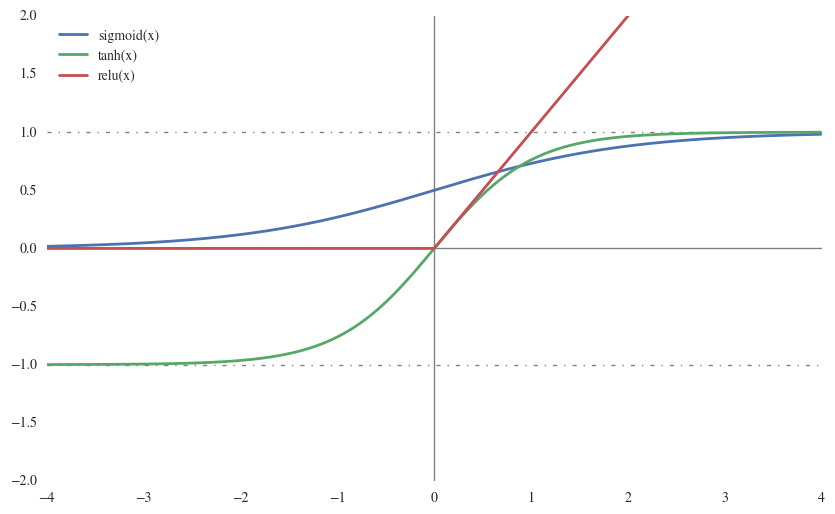

In [76]:
sigmoid = lambda t: 1 / (1 + np.exp(-t))
tanh = lambda t: (np.exp(t) - np.exp(-t)) / (np.exp(t) + np.exp(-t))
relu = lambda t:  np.maximum(t,0.)
softmax = lambda t: np.exp(t) / np.sum((1 + np.exp(t)), axis=0)
x = np.arange(-4,4,0.01) 

plt.axhline(y=0, ls='-', lw=1, color='gray')
plt.axvline(x=0, ls='-', lw=1, color='gray')
plt.axhline(y=-1., ls='-.', lw=1, color='gray')
plt.axhline(y=1., ls='-.', lw=1, color='gray')
plt.plot(x, sigmoid(x), label="sigmoid(x)")
plt.plot(x, tanh(x), label="tanh(x)")
plt.plot(x, relu(x), label="relu(x)")
plt.legend(loc=2)
plt.ylim([-2,2])

_= plt.show()

Most of the model stays the same. For clarity, let's separate the model part as a function, to which we feed the data.  

     ...
     def model(data):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.relu(layer1)
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
     ...
        
        
The hidden layer takes the output from the initial layer and applies the relu activation function. Then the output of the hidden layer is taken into a second logistic layer to produce the ```logits``` evidence.

In [50]:
batch_size = 256
hidden_nodes = 1024

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
    layer2_biases = tf.Variable(tf.zeros([10]))

    # Model.
    def model(data):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.relu(layer1)
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
    
    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [78]:
def run_session(num_epochs):
    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()
        print("Initialized")
        for epoch in range(num_epochs):
            offset = (epoch * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (epoch % 500 == 0):
                print('Minibatch loss at epoch %d: %f' % (epoch, l))
                print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
                print('Validation accuracy: %.1f%%' % accuracy(valid_prediction.eval(), valid_labels))
        print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

run_session(3001)

Initialized
Minibatch loss at epoch 0: 3483.470459
Minibatch accuracy: 9.8%
Validation accuracy: 16.6%
Minibatch loss at epoch 500: 1906.017700
Minibatch accuracy: 82.4%
Validation accuracy: 79.3%
Minibatch loss at epoch 1000: 1154.002319
Minibatch accuracy: 75.4%
Validation accuracy: 80.6%
Minibatch loss at epoch 1500: 696.934753
Minibatch accuracy: 82.4%
Validation accuracy: 81.3%
Minibatch loss at epoch 2000: 421.360168
Minibatch accuracy: 85.2%
Validation accuracy: 82.5%
Minibatch loss at epoch 2500: 255.492996
Minibatch accuracy: 82.4%
Validation accuracy: 83.3%
Minibatch loss at epoch 3000: 154.693481
Minibatch accuracy: 85.2%
Validation accuracy: 84.3%
Test accuracy: 90.9%


---   
- Step 3 - 
=============
Regularization
--------------

So far, we have investigated logistic regression with Gradient Descent and also a Stochastic Gradient Descent alternative. We have also looked at a simple neural network model with a single hidden layer and seen how to integrate the relu activation function in the model definition. 

The next area to consider is regularization techniques, and we will show how this can improve performance given an overfitted classifier.

---   

---
Simple Neural Network with L2 regularization
---------

Let's try to add L2 regularization to the simple 1 hidden layer neural network model. To do so, we add a L2  penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`.

We want to compute and add this L2 loss to all the weights and biases, and then add the total regularization factor across all the parameters to the overall loss function. Then this new *regularized* loss function will be the input to the SGD optimization.  Basically, we add the following to our model:   

    ...
    regularizers = (tf.nn.l2_loss(layer1_weights) +
                    tf.nn.l2_loss(layer1_biases) + 
                    tf.nn.l2_loss(layer2_weights) + 
                    tf.nn.l2_loss(layer2_biases))
   
    loss += lamb_reg * regularizers
    ...


A lambda hyper-parameter helps to choose the right amount of L2 regularization. The right choice should improve our performance in terms of validation and test accuracy.

---

In [79]:
batch_size = 256
hidden_nodes = 1024
lamb_reg = 0.01

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
    layer2_biases = tf.Variable(tf.zeros([10]))

    # Model.
    def model(data):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.relu(layer1)
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
    
    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + 
                    tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases))
    # Add the regularization term to the loss.
    loss += lamb_reg * regularizers

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))
    
# Run the session
run_session(3001)

Initialized
Minibatch loss at epoch 0: 3427.588135
Minibatch accuracy: 9.4%
Validation accuracy: 22.7%
Minibatch loss at epoch 500: 1910.067383
Minibatch accuracy: 82.4%
Validation accuracy: 79.0%
Minibatch loss at epoch 1000: 1155.991699
Minibatch accuracy: 78.9%
Validation accuracy: 81.3%
Minibatch loss at epoch 1500: 698.664001
Minibatch accuracy: 84.8%
Validation accuracy: 81.8%
Minibatch loss at epoch 2000: 422.154877
Minibatch accuracy: 85.2%
Validation accuracy: 82.8%
Minibatch loss at epoch 2500: 255.945023
Minibatch accuracy: 83.2%
Validation accuracy: 83.4%
Minibatch loss at epoch 3000: 155.004272
Minibatch accuracy: 86.3%
Validation accuracy: 84.5%
Test accuracy: 90.4%


---
Example - extreme overfitting
---------
Let's demonstrate an extreme case of overfitting. That is, we don't give the model enough data to learn with - we restrict the training data to just 40 batches of 256 images. What happens to the accuracy score on the test set?

---

In [80]:
# Run a session with just 40 batches
run_session(40)

Initialized
Minibatch loss at epoch 0: 3477.434814
Minibatch accuracy: 5.1%
Validation accuracy: 20.9%
Test accuracy: 78.5%


---
Regularization using dropout
---------
Another strategy for regularization is to throw away some of the information from the hidden layer. We can introduce this "dropout" on the hidden layer of the neural network, which basically means that we discard a certain percentage share of the data before going to the final fully connected layer. Dropout should only be introduced during training, not evaluation, since we don't want to make the evaluation results to be stochastic. TensorFlow provides the function `nn.dropout()` to discard everything but the ```keep_prob``` share of outputs from the hidden layer.  

We introduce it in the model on the output of the layer from relu. We need a way of indicating in the run of the model whether it is a training run or not, so when we want dropout, we will specify the probability share to the model, and when we don't, we will set this to 1.0:

    ...
    def model(data, proba=keep_prob):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
         # dropout on the hidden layer
        hidden1 = tf.nn.dropout(tf.nn.relu(layer1), proba)
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
    ...

---

In [104]:
batch_size = 256
hidden_nodes = 1024
lamb_reg = 0.01

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
    layer1_biases = tf.Variable(tf.zeros([hidden_nodes]))
    layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
    layer2_biases = tf.Variable(tf.zeros([10]))
        
    keep_prob = tf.placeholder("float")
    
    # Model with dropout
    def model(data, proba=keep_prob):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.dropout(tf.nn.relu(layer1), proba)   # dropout on the hidden layer
        return tf.matmul(hidden1, layer2_weights) + layer2_biases
    
    # Training computation.
    logits = model(tf_train_dataset, keep_prob)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + 
                    tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases))
    # Add the regularization term to the loss.
    loss += lamb_reg * regularizers

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset,1.0))
    test_prediction = tf.nn.softmax(model(tf_test_dataset,1.0))

The only change for the function to run the session is to add ```keep_prob``` to the ```feed_dict``` dictionary. We call the probability share ```k_prob``` and make it an input parameter to the ```run_session()``` function.

In [112]:
# Re-define the function to include the keep probability
def run_session(num_epochs, k_prob):

    with tf.Session(graph=graph) as session:
        tf.initialize_all_variables().run()
        print("Initialized")
        for epoch in range(num_epochs):
            offset = (epoch * batch_size) % (train_labels.shape[0] - batch_size)
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, keep_prob : k_prob}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (epoch % 500 == 0):
                print("Minibatch loss at epoch {}: {}".format(epoch, l))
                print("Minibatch accuracy: {:.1f}".format(accuracy(predictions, batch_labels)))
                print("Validation accuracy: {:.1f}".format(accuracy(valid_prediction.eval(), valid_labels)))
        print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_labels)))
        
run_session(3001, 0.5)

Initialized
Minibatch loss at epoch 0: 2.3076064586639404
Minibatch accuracy: 12.5
Validation accuracy: 9.3
Minibatch loss at epoch 500: 0.6352158784866333
Minibatch accuracy: 87.5
Validation accuracy: 79.4
Minibatch loss at epoch 1000: 0.5553681254386902
Minibatch accuracy: 87.5
Validation accuracy: 82.5
Minibatch loss at epoch 1500: 0.3590235710144043
Minibatch accuracy: 93.8
Validation accuracy: 83.8
Minibatch loss at epoch 2000: 0.4812794327735901
Minibatch accuracy: 87.5
Validation accuracy: 84.8
Minibatch loss at epoch 2500: 0.2852135896682739
Minibatch accuracy: 93.8
Validation accuracy: 85.5
Minibatch loss at epoch 3000: 0.1930667757987976
Minibatch accuracy: 93.8
Validation accuracy: 85.8
Test accuracy: 92.1


The improvement in test accuracy is marginal. This is likely because we are already taking into account the L2 loss regularizers.

## What happens to our extreme overfitting case?

In [83]:
# Run a session with just 40 batches
run_session(40, 0.5)

Initialized
Minibatch loss at epoch 499: 3656.74658203125
Minibatch accuracy: 11.7
Validation accuracy: 18.0
Test accuracy: 84.4


Simply by adding dropout to the model, even the overfitting case has an improvement in test accuracy, slightly larger than in the full 3001 epoch case.

---
- Step 4 -
============
Best performing multi-layer model
---------

Before moving on to ConvNets, we try to improve the performance using a multi-layer, fully connected *regular* neural network. According to the Udacity course, the best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

As suggested in Udacity, in order to deepen the model, we can first try to add multiple layers. Since we are dealing with 28x28 pixel images (with only 1 color channel), each new hidden layer adds at least 784x11 new parameters.  As the image size increases, the new of new parameters for each new layer gets very large.

Another way to add depth to the moddel is to use learning rate decay:   

    ...
    global_step = tf.Variable(0)  # count number of steps taken
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    ...
 
 ---

To facilitate the coding of new parameters, we can add functions for defining the weights and biases. So far, these have always been specified the same way, the only change for a certain layer is its shape. So we define two functions ```weight_variable(shape)``` and ```bias_variable(shape)```.  We also define an lambda function that will split a shape size by half, $k$ times, to help when defining new layers.

In [84]:
def weight_variable(shape):
    #initial = tf.truncated_normal(shape, stddev=0.01)
    initial = tf.truncated_normal(shape, stddev=tf.sqrt(2.0/shape[0]))
    return tf.Variable(initial)

def bias_variable(shape):
    #initial = tf.constant(0.1, shape=shape)
    initial = tf.zeros(shape)
    return tf.Variable(initial)

split_by_half = lambda x,k : int(x/2**k)

### Use this one

In [95]:
batch_size = 256
hidden_nodes = 1024
lamb_reg = 0.001

graph = tf.Graph()
with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, 784))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, 10))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = weight_variable([784, hidden_nodes])
    layer1_biases = bias_variable([hidden_nodes])
    layer2_weights = weight_variable([hidden_nodes, split_by_half(hidden_nodes,1)])
    layer2_biases = bias_variable([split_by_half(hidden_nodes,1)])   
    layer3_weights = weight_variable([split_by_half(hidden_nodes,1), split_by_half(hidden_nodes,2)])
    layer3_biases = bias_variable([split_by_half(hidden_nodes,2)])    
    layer4_weights = weight_variable([split_by_half(hidden_nodes,2), 10])
    layer4_biases = bias_variable([10])
    
    keep_prob = tf.placeholder("float")
    
    # Model with dropout
    def model(data, proba=keep_prob):
        layer1 = tf.matmul(data, layer1_weights) + layer1_biases
        hidden1 = tf.nn.dropout(tf.nn.relu(layer1), proba)  # dropout on hidden layer
        layer2 = tf.matmul(hidden1, layer2_weights) + layer2_biases  # a new hidden layer
        hidden2 = tf.nn.dropout(tf.nn.relu(layer2), proba)
        layer3 = tf.matmul(hidden2, layer3_weights) + layer3_biases
        hidden3 = tf.nn.dropout(tf.nn.relu(layer3), proba)
        return tf.matmul(hidden3, layer4_weights) + layer4_biases
    
    # Training computation.
    logits = model(tf_train_dataset, keep_prob)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + \
                    tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases) + \
                    tf.nn.l2_loss(layer3_weights) + tf.nn.l2_loss(layer3_biases) + \
                    tf.nn.l2_loss(layer4_weights) + tf.nn.l2_loss(layer4_biases) )

    # Add the regularization term to the loss.
    #loss += lamb_reg * regularizers
    loss = tf.reduce_mean(loss + lamb_reg * regularizers)

    # Optimizer.
    # learning rate decay
    global_step = tf.Variable(0)  # count  number of steps taken.
    start_learning_rate = 0.5
    learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.96, staircase=True)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset,1.0))
    test_prediction = tf.nn.softmax(model(tf_test_dataset,1.0))

In [96]:
run_session(3001, 0.5)

Initialized
Minibatch loss at epoch 3000: 4.088006973266602
Minibatch accuracy: 10.5
Validation accuracy: 31.7
Minibatch loss at epoch 3000: 1.3682267665863037
Minibatch accuracy: 84.4
Validation accuracy: 84.8
Minibatch loss at epoch 3000: 1.1769301891326904
Minibatch accuracy: 81.6
Validation accuracy: 85.9
Minibatch loss at epoch 3000: 0.8985941410064697
Minibatch accuracy: 85.2
Validation accuracy: 87.0
Minibatch loss at epoch 3000: 0.7439368963241577
Minibatch accuracy: 85.5
Validation accuracy: 87.0
Minibatch loss at epoch 3000: 0.7164523601531982
Minibatch accuracy: 85.9
Validation accuracy: 87.5
Minibatch loss at epoch 3000: 0.5978392958641052
Minibatch accuracy: 87.5
Validation accuracy: 87.4
Test accuracy: 92.7


You can experiment more with these multilayer models. There is even a [deep playground](http://playground.tensorflow.org/) built with TensorFlow where you can try out different architectures, activation functions, regularization strategies and learning rates.  But in recent years, deep learning on images is mostly done using Convolutional Neural Networks (CNN), rather than deep stacks of layers with dense matrix multiplications with varying weights. CNNs, because they exploit the structure of the image and can therefore share weights, allow deeper networks with less parameters. 

How does this work? - the CNN learns about entities in the data - e.g. parts of the images: such as edges, or patches of similarly colored pixels, or entire images of cats, etc.  - and it exploits these 'statistical invariants' to share the parameters - the weights - and to learn them jointly and only once across inputs. Things that don't change over time and/or space are ubiquitous. For images, CNNs perform better than multilayer dense networks, with less parameters. In text classification, the same reasoning leads to embeddings and recurrent Neural Networks.  

Before going into CNNs, we will reload the data, since we revert to using the 28x28 data - called the image's feature map. 

In [106]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


If we had a color image (i.e. $3$ channels) we would have $3$ feature maps. But since we have just grayscale, there is only one input feature map, and the number of channels is $1$. We will create 4D tensors - each image is 28x28x1 and there are 20k, 10k and 10k of them stacked in the train, valid and test arrays  respectively.

In [107]:
image_size = 28
num_labels = 10
num_channels = 1 # grayscale

import numpy as np

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28, 1) (200000, 10)
Validation set (10000, 28, 28, 1) (10000, 10)
Test set (10000, 28, 28, 1) (10000, 10)


---
- Step 5 -
============
Convolutional Neural Nets
---------

Now we turn to building a CNN using the architecture described in the TensorFlow website tutorial [Deep MNIST for Experts](https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html). It will be a small network with two convolutional layers, followed by one fully connected layer. We'll limit the depth of this model so that it will run fine on the CPU and give a more elaborate architecture below that you can experiment with. Most production CNNs run on GPUs because they require more computation power. You can also find this example explained in Chapter 5 of [First Contact with TensorFlow](http://www.jorditorres.org/first-contact-with-tensorflow/) and in Chapter 5 of "Getting started with TensorFlow" available on [Proquest through Hollis](http://proquest.safaribooksonline.com.ezp-prod1.hul.harvard.edu/book/programming/machine-learning/9781786468574)

### Other useful references
There are also web books: Michael A. Nielsen, [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap6.html) and Goodfellow-et-al [Deep Learning](http://www.deeplearningbook.org/) (which is a preprint, available in HTML). There is also [Colah's blog](http://colah.github.io/) that explains convolutions and has some impressive visualizations. 

If you want to experiment hands-on with convolutions, then download [the GIMP](https://www.gimp.org/downloads/) (if you don't already have it), load up some of your favourite images, and then go to Filters $\rightarrow$ Generic $\rightarrow$ Convolution Matrix.  
[Here](https://docs.gimp.org/en/plug-in-convmatrix.html) are some examples.

---

Choices to make in a CNN
* convolution kernel dimensions: the patch size (e.g. 5x5)
* stride length: 1, 2, something else
* the padding, SAME or VALID
* pooling: average or max pooling, pooling size  


To make the CNN, we will use two other nn functions in TensorFlow. The first is for the convolution itself, called [```tf.nn.conv2d()```](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d) . The function takes a 4D input tensor (hence the reformatting in the previous box), the weight variable and then both the stride and padding are specified as parameters.  

We redefine the weight and bias functions as per the TensorFlow example.


In [108]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [110]:
image_size = 28
num_labels = 10
num_channels = 1 # grayscale
batch_size = 16
patch_size = 5
depth1 = 32
depth2 = 64
num_hidden = 1024

graph = tf.Graph()

with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    layer1_weights = weight_variable([patch_size, patch_size, num_channels, depth1])
    layer1_biases = bias_variable([depth1])
    layer2_weights = weight_variable([patch_size, patch_size, depth1, depth2])
    layer2_biases = bias_variable([depth2])
    layer3_weights = weight_variable([image_size // 4 * image_size // 4 * depth2, num_hidden])
    layer3_biases = bias_variable([num_hidden])
    layer4_weights = weight_variable([num_hidden, num_labels])
    layer4_biases = bias_variable([num_labels])

    keep_prob = tf.placeholder(tf.float32)
    # Model with dropout
    def model(data, proba=keep_prob):
        # Convolution
        conv1 = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME') + layer1_biases
        pooled1 = tf.nn.max_pool(tf.nn.relu(conv1), ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
        # Convolution
        conv2 = tf.nn.conv2d(pooled1, layer2_weights, [1, 1, 1, 1], padding='SAME') + layer2_biases
        pooled2 = tf.nn.max_pool(tf.nn.relu(conv2), ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
        # Fully Connected Layer
        shape = pooled2.get_shape().as_list()
        reshape = tf.reshape(pooled2, [shape[0], shape[1] * shape[2] * shape[3]])
        full3 = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        # Dropout
        full3 = tf.nn.dropout(full3, proba)
        return tf.matmul(full3, layer4_weights) + layer4_biases
  
    # Training computation.
    logits = model(tf_train_dataset, keep_prob)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset,1.0))
    test_prediction = tf.nn.softmax(model(tf_test_dataset,1.0))

In [111]:
run_session(20001,0.5)

Initialized
Minibatch loss at epoch 3000: 2.3040881156921387
Minibatch accuracy: 12.5
Validation accuracy: 10.0
Minibatch loss at epoch 3000: 0.633957028388977
Minibatch accuracy: 87.5
Validation accuracy: 79.3
Minibatch loss at epoch 3000: 0.6006407737731934
Minibatch accuracy: 87.5
Validation accuracy: 82.9
Minibatch loss at epoch 3000: 0.43959537148475647
Minibatch accuracy: 93.8
Validation accuracy: 84.1
Minibatch loss at epoch 3000: 0.5256718993186951
Minibatch accuracy: 81.2
Validation accuracy: 85.1
Minibatch loss at epoch 3000: 0.27005499601364136
Minibatch accuracy: 87.5
Validation accuracy: 85.7
Minibatch loss at epoch 3000: 0.17102743685245514
Minibatch accuracy: 93.8
Validation accuracy: 86.1
Minibatch loss at epoch 3000: 0.3197937607765198
Minibatch accuracy: 87.5
Validation accuracy: 86.7
Minibatch loss at epoch 3000: 0.6676424145698547
Minibatch accuracy: 81.2
Validation accuracy: 86.8
Minibatch loss at epoch 3000: 0.434349000453949
Minibatch accuracy: 87.5
Validation ac